In [163]:
import numpy as np
import pandas as pd

import cv2
import json
#from pprint import pprint


#%matplotlib inline 

#np.set_printoptions(threshold=sys.maxsize)


In [164]:
import os,sys

import matplotlib.pyplot as plt
%matplotlib inline
#from PIL import Image


!pip install tensorflow==1.12.0

!pip install keras==2.1.6


In [165]:
from keras import backend as K
K.set_image_dim_ordering('tf') # execute tensorflow as backend
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils #one hot encoding

In [166]:
#packages for cnn

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#to avoid overfitting include dropout
from keras.layers import Dropout
#to flatten maxpool layer o/p
from keras.layers import Flatten

In [167]:
from IPython.display import display 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Setting up Parameters

In [168]:
IMG_SIZE_FINAL = 150
#validating_size = 40
#nodes_fc1 = 4096
#nodes_fc2 = 4096
num_classes = 0  # will take dynamically 
IMG_PATH = 'C:/GreatLakes/Capstone/ImgData/10Catg500imgs/'

In [169]:
#train_df = pd.read_json("C:\\GreatLakes\\Capstone\\Data\\train-SML.json")
temp_df= pd.read_json(IMG_PATH+"JSON/data.json")

In [170]:
temp_df.head()

,image
0,"{'image_label': 'hot_pot', 'image_id': 1, 'ima..."
1,"{'image_label': 'hot_pot', 'image_id': 2, 'ima..."
2,"{'image_label': 'hot_pot', 'image_id': 3, 'ima..."
3,"{'image_label': 'hot_pot', 'image_id': 4, 'ima..."
4,"{'image_label': 'hot_pot', 'image_id': 5, 'ima..."


In [171]:
train_df=pd.DataFrame([(temp_df.image[i]['image_id'],temp_df.image[i]['image_name'],temp_df.image[i]['image_label']) for i in  
              range(len(temp_df))], columns=['image_id','image_name','label_id'])

In [172]:
train_df.shape

(5132, 3)

In [173]:
train_df.head(10)

,image_id,image_name,label_id
0,1,image_id_1__57171f60N523c940e.jpg,hot_pot
1,2,image_id_2__T1pFCtFbVcXXXXXXXX_%21%210-item_pi...,hot_pot
2,3,image_id_3__59b25f42N52ee2b0c.jpg,hot_pot
3,4,image_id_4__TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855...,hot_pot
4,5,image_id_5__QQI-390870207-1.jpg,hot_pot
5,6,image_id_6__TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-it...,hot_pot
6,7,image_id_7__6016537.jpg,hot_pot
7,8,image_id_8__5672f5e9N7dfa5a0e.jpg%21q70.jpg,hot_pot
8,9,image_id_9__683fc19f3fbdeaeb6af8bdee95ca5fd0.jpg,hot_pot
9,10,image_id_10__75ecb96db31337096ac2a9df85f00663.jpg,hot_pot


In [174]:
train_df.image_id[0]

1

In [175]:
train_df.image_id[1]

2

In [176]:
train_df.label_id[0]

'hot_pot'

In [177]:
train_df.label_id.value_counts()

lamp             519
water_filter     519
dinning_table    519
hot_pot          519
office_chair     519
jug              519
mirror           516
cooker           502
sofa             500
bowl             500
Name: label_id, dtype: int64

In [178]:
num_classes = train_df.label_id.nunique()

In [179]:
num_classes

10

In [50]:
file_remove = [f for f in os.listdir(IMG_PATH+'GR') if os.path.isfile(IMG_PATH+f)]
for f in file_remove:
    os.remove(IMG_PATH+'GR/'+f)

In [51]:
file_remove = [f for f in os.listdir(IMG_PATH+'GR_SML') if os.path.isfile(IMG_PATH+f)]
for f in file_remove:
    os.remove(IMG_PATH+'GR_SML/'+f)

In [68]:
from matplotlib import pyplot as plt
var = 0
label = np.array([])



for im in range(len(train_df)):

    var = var + 1
    if var >= 5200:
        break

    print (train_df.image_name[im] , '                 ' ,  var )
    print (train_df.label_id[im])
    try:
        #Original Image : Read in numpy array and find shape
        img_array = np.array(cv2.imread( IMG_PATH + train_df.image_name[im] ))
        print("Original  : " , img_array.shape)
        
        #Use OpenCV to convert the RGB image to GRAYSCALE
        image_gr = cv2.imread( IMG_PATH + train_df.image_name[im] ,cv2.IMREAD_GRAYSCALE)
        #Not really required to write it back
        cv2.imwrite( IMG_PATH + 'GR/' + train_df.image_name[im]   ,image_gr)
       
        #Grayscale Image : Read in numpy array and find shape
        img_array = np.array(cv2.imread( IMG_PATH + 'GR/' + train_df.image_name[im] ))
        print( "Grayscale  : ", img_array.shape)
        
        
        image_gr_sml = cv2.resize(image_gr, (int(IMG_SIZE_FINAL) ,int(IMG_SIZE_FINAL)   ))
        #Not really required to write it back
        cv2.imwrite( IMG_PATH + 'GR_SML/' + train_df.image_name[im]   ,image_gr_sml)
                 
        #Small Gray Image : Read in numpy array and find shape
        img_array = np.array(cv2.imread( IMG_PATH + 'GR_SML/' + train_df.image_name[im] ))
        print( "Small Grayscale  : ", img_array.shape)
        

        label = np.append(label , train_df.label_id[im] )

        #cv2.imshow("Show Small gray image by CV2",image_gr_sml)
        #cv2.waitKey(0)
        
    except:
        print("Exception occured for " + train_df.image_name[im])
        continue
#cv2.destroyAllWindows()


image_id_1__57171f60N523c940e.jpg                   1
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_2__T1pFCtFbVcXXXXXXXX_%21%210-item_pic.jpg                   2
hot_pot
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_2__T1pFCtFbVcXXXXXXXX_%21%210-item_pic.jpg
image_id_3__59b25f42N52ee2b0c.jpg                   3
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_4__TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855447419.jpg                   4
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_5__QQI-390870207-1.jpg                   5
hot_pot
Original  :  (1390, 1100, 3)
Grayscale  :  (1390, 1100, 3)
Small Grayscale  :  (150, 150, 3)
image_id_6__TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-item_pic.jpg                   6
hot_pot
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_7

Small Grayscale  :  (150, 150, 3)
image_id_55__56f139ffNef85d7e3.jpg                   50
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_56__4b90f603738da977d786bdcdbb51f8198718e3af.jpg                   51
hot_pot
Original  :  (300, 708, 3)
Grayscale  :  (300, 708, 3)
Small Grayscale  :  (150, 150, 3)
image_id_58__TB233tBmUhnpuFjSZFpXXcpuXXa_!!828769044.jpg                   52
hot_pot
Original  :  (700, 700, 3)
Grayscale  :  (700, 700, 3)
Small Grayscale  :  (150, 150, 3)
image_id_59__586627abNf46e82dc.jpg                   53
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_60__56712b79Nf6f92db7.jpg                   54
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_61__TB2zB0OamJjpuFjy0FdXXXmoFXa_!!1583426627.jpg                   55
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscal

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_106__55a37e55N7a01fe7b.jpg                   99
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_107__b3fb43166d224f4a783d98340af790529822d175.jpg                   100
hot_pot
Original  :  (351, 371, 3)
Grayscale  :  (351, 371, 3)
Small Grayscale  :  (150, 150, 3)
image_id_167__58cd44f1Nc0645744.jpg                   101
hot_pot
Original  :  (540, 405, 3)
Grayscale  :  (540, 405, 3)
Small Grayscale  :  (150, 150, 3)
image_id_168__56f20bc1N16ac3ce5.jpg                   102
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_169__591eb7c9N07ab0187.jpg                   103
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_170__58afe450N791eb1e9.jpg                   104
hot_pot
Original  :  (350, 350, 3)
Grayscale  :  (350, 350, 3)
Small Grayscale  :  

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_224__dbb44aed2e738bd4f5234708aa8b87d6277ff98d.jpg                   153
hot_pot
Original  :  (797, 1200, 3)
Grayscale  :  (797, 1200, 3)
Small Grayscale  :  (150, 150, 3)
image_id_225__TB2jZ.8nVXXXXaRXXXXXXXXXXXX_!!88632641.jpg                   154
hot_pot
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_226__57870219N876a1670.jpg                   155
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_227__TB2jKEalFXXXXbCXXXXXXXXXXXX_!!1722981727.jpg                   156
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_228__1459302950.jpg                   157
hot_pot
Original  :  (1560, 2080, 3)
Grayscale  :  (1560, 2080, 3)
Small Grayscale  :  (150, 150, 3)
image_id_229__59f696e0N07eb1d93.jpg                   158
hot_pot
Original  :  (800, 800, 3)
Gray

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_277__thumb_201504121136232249.jpg                   204
hot_pot
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_277__thumb_201504121136232249.jpg
image_id_278__TB2R1f8obplpuFjSspiXXcdfFXa_!!681609116.jpg                   205
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_279__575a575aNbd6e8082.jpg                   206
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_280__581ffba3Nab9887ad.jpg                   207
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_281__57d8c355N921ad751.jpg                   208
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_282__586a033aNa4f6b3dc.jpg                   209
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Smal

Grayscale  :  (663, 960, 3)
Small Grayscale  :  (150, 150, 3)
image_id_327__TB2ikhxXbBnpuFjSZFGXXX51pXa_!!2061509221.jpg                   253
hot_pot
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_328__TB2PrkSe17JL1JjSZFKXXc4KXXa_!!907468127.jpg                   254
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_329__wKhQcFRH6saED8SeAAAAAFZ1-k8538.jpg                   255
hot_pot
Original  :  (497, 750, 3)
Grayscale  :  (497, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_330__201707030241556477.jpg                   256
hot_pot
Original  :  (656, 800, 3)
Grayscale  :  (656, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_331__543c959cNca7a0b47.jpg                   257
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_332__53a240c8N389f5e38.jpg                   258
hot_pot
Original  :  (800, 800, 3)
Grayscale  

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_389__59784242Na22770c2.jpg                   307
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_390__59608db8N5968cb7a.jpg                   308
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_391__0070063805-000000000104790241_3_800x800.jpg                   309
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_392__TB2ZK3_tR0kpuFjSsziXXa.oVXa_!!1021578509.png                   310
hot_pot
Original  :  (594, 560, 3)
Grayscale  :  (594, 560, 3)
Small Grayscale  :  (150, 150, 3)
image_id_393__5831b767Ne178f150.jpg                   311
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_395__5976fdcdN299ec739.jpg                   312
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 

image_id_444__1nrpz3_ie3wezdfga4wkzrvgqzdambqgayde_640x960.jpg                   358
hot_pot
Original  :  (960, 640, 3)
Grayscale  :  (960, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_445__TB2K3zmabH8F1JjSspiXXbiKpXa_!!3041347263.jpg                   359
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_446__5771ec39N0e837d3a.jpg                   360
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_447__58da6865Nd6d3d771.jpg                   361
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_449__TB2gmSac3RkpuFjy1zeXXc.6FXa_!!3019413338.jpg                   362
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_451__5619531dN719d8410.jpg                   363
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 

Small Grayscale  :  (150, 150, 3)
image_id_501__5784b338Nf8622a90.jpg                   412
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_502__TB1jle0IpXXXXbFXFXXXXXXXXXX_460x460xz.jpg                   413
hot_pot
Original  :  (460, 460, 3)
Grayscale  :  (460, 460, 3)
Small Grayscale  :  (150, 150, 3)
image_id_503__59ddee8962b56.jpg                   414
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_504__TB2UxRLkFXXXXbyXpXXXXXXXXXX_!!30843603.jpg                   415
hot_pot
Original  :  (1000, 1000, 3)
Grayscale  :  (1000, 1000, 3)
Small Grayscale  :  (150, 150, 3)
image_id_505__585747bcN73ef5748.jpg                   416
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_506__b901f4cdgce55d8f804cf&690                   417
hot_pot
Original  :  (494, 690, 3)
Exception occured for image_id_506__b901f4cdgce55d8f8

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_551__T1O83LFn0dXXXXXXXX_!!0-item_pic.jpg_460x460xz.jpg                   461
hot_pot
Original  :  (460, 460, 3)
Grayscale  :  (460, 460, 3)
Small Grayscale  :  (150, 150, 3)
image_id_552__2_0af93dd1c8880df76381bec9f38cbc62.jpg                   462
hot_pot
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_553__586db984Nd6d1d321.jpg                   463
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_554__57c14da0N9fc68723.jpg                   464
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_555__59c8cb2eN7f2fd551.jpg                   465
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_556__566ec388Ne0411332.jpg                   466
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 

Small Grayscale  :  (150, 150, 3)
image_id_606__2849_20141108113228344A.jpg                   512
hot_pot
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_606__2849_20141108113228344A.jpg
image_id_607__57f8a99dNb5a5344a.jpg                   513
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_608__56f2310bN902e37c9.jpg                   514
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_609__TB2aWLhXOsd61BjSZFxXXcdPpXa_!!2652432729.jpg                   515
hot_pot
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_610__606c3eb09074e05e_2.jpg                   516
hot_pot
Original  :  (498, 568, 3)
Grayscale  :  (498, 568, 3)
Small Grayscale  :  (150, 150, 3)
image_id_611__T1obWnFXXgXXXXXXXX_!!0-item_pic.jpg                   517
hot_pot
Original  :  (545, 545, 3)
Grayscale  :  (545, 545, 3)
Small Grayscale  :

Small Grayscale  :  (150, 150, 3)
image_id_54027__888888888888888c.jpg_360x360q90.jpg                   559
office_chair
Original  :  (360, 360, 3)
Grayscale  :  (360, 360, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54028__TB2FtSjxY4npuFjSZFmXXXl4FXa_!!728579038.jpg                   560
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54029__555072b8N59241187.jpg                   561
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54030__T1WqpKXwxcXXXXXXXX_%21%210-item_pic.jpg                   562
office_chair
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_54030__T1WqpKXwxcXXXXXXXX_%21%210-item_pic.jpg
image_id_54031__59e06facN42f6ec0e.jpg                   563
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54032__594b8c46N09be3f1b.jpg                   564
office_chair
Origina

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54074__TB2DSPJmFXXXXbOXXXXXXXXXXXX_!!1128665398.jpg                   605
office_chair
Original  :  (905, 800, 3)
Grayscale  :  (905, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54075__TB2aG_remiJ.eBjSspiXXbqAFXa_!!1095083291.jpg                   606
office_chair
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54076__596eba8aN8678eb81.jpg                   607
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54077__178094986414314474841733_x.jpg                   608
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54078__38918385_1411489226849_650x500.jpg                   609
office_chair
Original  :  (500, 650, 3)
Grayscale  :  (500, 650, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54079__TB2BCvaa4mI.eBjy0FlXXbgkVXa_!!2835749832.jpg

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54126__57b3c17fN05be3a22.jpg                   655
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54127__59cf3a22N3dd1d886.jpg                   656
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54128__53102f43b2d47082bc95_w.jpg                   657
office_chair
Original  :  (560, 750, 3)
Grayscale  :  (560, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54129__1020513727-1_u_1.jpg                   658
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54130__5588ccc7N758d618d.jpg                   659
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54131__MTQ1OTEwNTYzMDY2Mi0xNDE2MDQ1OTI=.jpg                   660
office_chair
Original  :  (493, 608, 3)
Grayscale

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54182__58e75c89N3ca9ec83.jpg                   705
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54183__Img411820563.jpg                   706
office_chair
Original  :  (500, 500, 3)
Grayscale  :  (500, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54184__5a29faa9Na23fa24d.jpg                   707
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54185__595b846dN187b86dd.jpg                   708
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54186__599d1e9fNfe09e22f.jpg                   709
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54187__000000000192648160_1_800x800.jpg                   710
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 80

Small Grayscale  :  (150, 150, 3)
image_id_54240__557be560N53bfeaa0.jpg%21q70.jpg                   759
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54241__572c0a32N078df7fa.jpg                   760
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54242__T1a09NXtJXXXXXXXXX_%21%210-item_pic.jpg                   761
office_chair
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_54242__T1a09NXtJXXXXXXXXX_%21%210-item_pic.jpg
image_id_54243__TB2DYXskbJkpuFjy1zcXXa5FFXa_!!2865534222.jpg                   762
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54244__551b47edN168f65a5.jpg                   763
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54245__TB2FoBegRDH8KJjSszcXXbDTFXa_!!2842107341.jpg                   764


Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54293__5937a467N2b79211c.jpg                   811
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54294__rBEhVlJSbdcIAAAAAAIkNKPhDd0AAD5fwNISnAAAiRM774.jpg                   812
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54295__59c0b446N1fc804eb.jpg                   813
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54296__TB2K7fnmXXXXXXVXpXXXXXXXXXX_!!68446518.jpg                   814
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54297__5a29faa9Na23fa24d.jpg                   815
office_chair
Original  :  (350, 350, 3)
Grayscale  :  (350, 350, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54298__59f803d8N30ba368f.jpg                   816
office_chair
Origi

Small Grayscale  :  (150, 150, 3)
image_id_54345__h5337001_10210737_170331042002_01_1200.jpg                   859
office_chair
Original  :  (1200, 1200, 3)
Grayscale  :  (1200, 1200, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54346__1238257_00_main.jpg                   860
office_chair
Original  :  (350, 350, 3)
Grayscale  :  (350, 350, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54347__5607b4b7Nd588c823.jpg                   861
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54348__TB2vv9ExstnpuFjSZFKXXalFFXa_!!140596563.jpg                   862
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54349__58aa9c9bN0939aa54.jpg                   863
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54350__TB2Ole.m6ihSKJjy0FfXXbGzFXa_!!1015747444.jpg                   864
office_chair
Original  :  (8

Small Grayscale  :  (150, 150, 3)
image_id_54402__58446aafNdf5ee880.jpg                   911
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54403__5522539_1429205270828_690x460.jpg                   912
office_chair
Original  :  (460, 460, 3)
Grayscale  :  (460, 460, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54404__5928e220Nc1eb0910.jpg                   913
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54405__59e8442eNb48d5256.jpg                   914
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54406__TB2BN6XhMvD8KJjy0FlXXagBFXa_!!2946296266.jpg                   915
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54407__wKhQslN6HCSEFBdoAAAAAEQqoEQ834.jpg                   916
office_chair
Original  :  (670, 700, 3)
Grayscal

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54454__708172-2.jpg                   958
office_chair
Original  :  (1390, 1100, 3)
Grayscale  :  (1390, 1100, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54455__20170404091815929.jpg                   959
office_chair
Original  :  (350, 350, 3)
Grayscale  :  (350, 350, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54456__000000000123165408_3_800x800.jpg                   960
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54457__TB2lh88gB8lpuFjSspaXXXJKpXa_!!1820204625.jpg                   961
office_chair
Original  :  (950, 950, 3)
Grayscale  :  (950, 950, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54458__0823dd54564e9258b17bf0ba9d82d158ccbf4e12.jpg                   962
office_chair
Original  :  (400, 780, 3)
Grayscale  :  (400, 780, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54459__5672d860N1024acdc.jpg                   963
office_chair
Ori

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54505__592e28c9Nbb8fdcbe.jpg                   1007
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54506__58a3ca85N275dcf2c.jpg                   1008
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54507__01a4705542f2370000019ae9df3651.jpg@1280w_1l_2o_100sh.jpg                   1009
office_chair
Original  :  (810, 790, 3)
Grayscale  :  (810, 790, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54508__58a177fcN6fe26970.jpg                   1010
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54509__59cb43f2Na122ad7a.jpg                   1011
office_chair
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_54510__551287c4N766e2a82.jpg%21q70.jpg                   1012
office_chair
Orig

Small Grayscale  :  (150, 150, 3)
image_id_81181__59ed9bc4N9443a07d.jpg                   1056
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81182__1877399_2.png                   1057
cooker
Original  :  (550, 367, 3)
Grayscale  :  (550, 367, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81183__5a3248f4N6950f5b3.jpg                   1058
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81184__595cab13N9d1c003e.jpg                   1059
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81185__566f88e8N71f69667.jpg                   1060
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81186__58eaf9b6N0d08f3a1.jpg                   1061
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81187__593a5caeNe751f50

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81236__TB266a0fXHM8KJjSZFwXXcibXXa_!!405125123.jpg                   1109
cooker
Original  :  (430, 430, 3)
Grayscale  :  (430, 430, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81237__21-13-17-41-10.jpg                   1110
cooker
Original  :  (310, 310, 3)
Grayscale  :  (310, 310, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81238__59e953d6N5bc27f5d.jpg                   1111
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81239__ChEbu1fFAWOAL2KkAAFRAwELnnE73700_640x640.jpg                   1112
cooker
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_81239__ChEbu1fFAWOAL2KkAAFRAwELnnE73700_640x640.jpg
image_id_81240__content1440402832344.png                   1113
cooker
Original  :  (420, 710, 3)
Grayscale  :  (420, 710, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81241__1472095018904841633.jpg                   1114
cooker
Original  :

Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81317__TB2lqaEe0rJ8KJjSspaXXXuKpXa_!!2776504997.jpg                   1164
cooker
Original  :  (1716, 1740, 3)
Grayscale  :  (1716, 1740, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81318__57933edeN5ee6c21e.jpg                   1165
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81319__58de08afNa14562a9.jpg                   1166
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81320__574d5913Nce8c6130.jpg                   1167
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81321__2015030710363261760_7861.png                   1168
cooker
Original  :  (451, 451, 3)
Grayscale  :  (451, 451, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81323__5a2e54f7N7002d66f.jpg                   1169
cooker
Original  :  (800, 800, 

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81381__ce84hpItA7k2s.jpg                   1217
cooker
Original  :  (299, 400, 3)
Grayscale  :  (299, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81382__58d2375bN371f81d9.jpg                   1218
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81383__yuan_5b05c8d5e1ba67ab090de4d70b20985a.jpg                   1219
cooker
Original  :  (853, 640, 3)
Grayscale  :  (853, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81384__TB29Xrjdx3IL1JjSZPfXXcrUVXa_!!2687356685.jpg                   1220
cooker
Original  :  (719, 716, 3)
Grayscale  :  (719, 716, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81385__big_77d0c7d5e74fd1644147e07fa66e1834.JPG                   1221
cooker
Original  :  (768, 1024, 3)
Grayscale  :  (768, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81386__TB2RGzfXx5GJuJjSZFrXXcDYXXa_!!234506312.jpg                   1222
cooker
Ori

Grayscale  :  (1659, 1920, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81438__TB2kPLdXKrAQeBjSZFrXXbSvFXa_!!2786150740.jpg                   1271
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81440__59755d0bN1baaa5f4.jpg                   1272
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81441__30333.jpg                   1273
cooker
Original  :  (311, 311, 3)
Grayscale  :  (311, 311, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81442__58135bcaN9ade6377.jpg                   1274
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81444__58c20bf3N037b6286.jpg                   1275
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81446__FuX_l0D7hNuCVKqn3fbggl9QKi2q.jpg%21730x0.jpg                   1276
cooker
Original  :  (743, 557, 3)
Grayscale  :  (743, 55

Small Grayscale  :  (150, 150, 3)
image_id_81502__b37a6e8a-71dc-43dc-a6e6-c9c4704b7546_t.jpg                   1326
cooker
Original  :  (531, 420, 3)
Grayscale  :  (531, 420, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81503__570e337bNff4059c1.jpg                   1327
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81504__1357ff2bd08afd9.jpg                   1328
cooker
Original  :  (261, 260, 3)
Grayscale  :  (261, 260, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81506__TB2aeEVdbJmpuFjSZFBXXXaZXXa_!!2096024161.jpg                   1329
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81507__3889299_1.jpg                   1330
cooker
Original  :  (334, 450, 3)
Grayscale  :  (334, 450, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81508__8303520_11_thumb.png                   1331
cooker
Original  :  (386, 600, 3)
Grayscale  :  (386, 600, 3)
Small Grayscale  :  (150,

Small Grayscale  :  (150, 150, 3)
image_id_81566__090539971.jpg                   1378
cooker
Original  :  (367, 550, 3)
Grayscale  :  (367, 550, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81567__o156653001267611038.jpg                   1379
cooker
Original  :  (568, 974, 3)
Grayscale  :  (568, 974, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81568__0042040657776683_b.jpg                   1380
cooker
Original  :  (987, 1004, 3)
Grayscale  :  (987, 1004, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81569__TB2fxCqaNuaVKJjSZFjXXcjmpXa_!!2985169668.jpg                   1381
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81570__5708cd2fN43ce7733.jpg                   1382
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81571__5a2b8e5eN599b1e23.jpg                   1383
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
imag

Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81624__59ffd6ffN4af89753.jpg                   1435
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81625__2013100017202670211.jpg                   1436
cooker
Original  :  (380, 380, 3)
Grayscale  :  (380, 380, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81626__TB2i3bCdr0kpuFjy0FjXXcBbVXa_!!2621543169.jpg                   1437
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81627__da2ebf3afbba11e5af8600163e00254c.jpg                   1438
cooker
Original  :  (506, 577, 3)
Grayscale  :  (506, 577, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81629__5909b331Nbc08d7c7.jpg                   1439
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81630__81Wv46KsBnL._SL1500_.jpg                   1440
cooker
Original  :  (1

Small Grayscale  :  (150, 150, 3)
image_id_81689__58de08c5N27de8c84.jpg                   1485
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81691__58d52aeeNa79deb86.jpg                   1486
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81692__57a99fddN2d59b654.jpg                   1487
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81693__59eeadb6N0b6c83f5.jpg                   1488
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81694__TB2mVBJba_ST1JjSZFqXXcQxFXa_!!2417700848.jpg                   1489
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81697__30155038_6128.jpg                   1490
cooker
Original  :  (601, 800, 3)
Grayscale  :  (601, 800, 3)
Small Grayscale  :  (150, 150, 3)
image

Grayscale  :  (1449, 1228, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81750__2077831_1.png                   1537
cooker
Original  :  (367, 550, 3)
Grayscale  :  (367, 550, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81751__5a199ee8N8b88728e.jpg                   1538
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81752__5a545fd9Nf5359878.jpg                   1539
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_81753__571f14a6Nbaa1df54.jpg                   1540
cooker
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91395__c33bf9bb-7b63-4a9e-a767-18831485f497.png                   1541
jug
Original  :  (900, 900, 3)
Grayscale  :  (900, 900, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91396__5a255ef1Nc4585910.jpg                   1542
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (15

Small Grayscale  :  (150, 150, 3)
image_id_91439__59422db0N18d8c358.jpg                   1583
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91440__56fe2a98N2426b2a0.jpg                   1584
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91441__20170807060042902.jpg                   1585
jug
Original  :  (400, 281, 3)
Grayscale  :  (400, 281, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91442__54f70460N844e4d87.jpg                   1586
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91443__T1uk5.FypXXXXXXXXX_%21%210-item_pic.jpg                   1587
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_91443__T1uk5.FypXXXXXXXXX_%21%210-item_pic.jpg
image_id_91444__54505d42N4ab8080a.jpg                   1588
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
im

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91493__TB2MmrLatHC11BjSszeXXbZppXa_!!1855745655.jpg                   1633
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91494__1425851_b4.png                   1634
jug
Original  :  (367, 550, 3)
Grayscale  :  (367, 550, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91495__TFG-6947260411075-4.jpg                   1635
jug
Original  :  (1390, 1100, 3)
Grayscale  :  (1390, 1100, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91496__TB2ZfVYjwJkpuFjSszcXXXfsFXa_!!677565087.jpg                   1636
jug
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91497__687474703a2f2f6777312e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69342f5442327167475f6b72466b7075466a793158635858636c617058615f2121313734313636343438362e6a7067.jpg                   1637
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_91

Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91654__53eb18baN1f8e6c53.jpg                   1678
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91655__3960_P_1440195486574.png                   1679
jug
Original  :  (1586, 1310, 3)
Grayscale  :  (1586, 1310, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91657__TB2BqnyhWagSKJjy0FhXXcrbFXa_!!2536274776.jpg                   1680
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91658__T1AnuKXkduXXcvIrw6_061014.jpg                   1681
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_91658__T1AnuKXkduXXcvIrw6_061014.jpg
image_id_91659__201683114503DT29JFN83Z.jpg                   1682
jug
Original  :  (300, 300, 3)
Grayscale  :  (300, 300, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91660__CgQCr1GQfRCALJyZAAFk8Uax8yw51100.jpg                   1683
jug
Original  :  (800, 800, 3)
Graysc

Small Grayscale  :  (150, 150, 3)
image_id_91711__U3293P746DT20120528105147.jpg                   1730
jug
Original  :  (291, 412, 3)
Grayscale  :  (291, 412, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91712__wKhQc1StdJiEV3CDAAAAAB1Pp2M006.jpg..300x300.jpg                   1731
jug
Original  :  (276, 300, 3)
Grayscale  :  (276, 300, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91713__59e845a6N58232a40.png                   1732
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91714__09db2816cc2e4ffb88c1852b50e8d237.jpeg                   1733
jug
Original  :  (640, 640, 3)
Grayscale  :  (640, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91715__CgQCsFJW5ACAIFXFAAIjSPDUCj054901_450x450.jpg                   1734
jug
Original  :  (450, 450, 3)
Grayscale  :  (450, 450, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91716__595744f8N22466c3d.jpg                   1735
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Sma

Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91765__T17_Y_FmXgXXXXXXXX_%21%210-item_pic.jpg                   1779
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_91765__T17_Y_FmXgXXXXXXXX_%21%210-item_pic.jpg
image_id_91766__20150806104908141.jpg                   1780
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91767__687474703a2f2f6777322e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69322f5431707a6d4f4667685858585858585858585f2121302d6974656d5f7069632e6a7067.jpg                   1781
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_91767__687474703a2f2f6777322e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69322f5431707a6d4f4667685858585858585858585f2121302d6974656d5f7069632e6a7067.jpg
image_id_91768__57fde6dcN3ec15b10.jpg                   1782
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91769__541a

image_id_91827__2014211121753492.jpg                   1833
jug
Original  :  (497, 566, 3)
Grayscale  :  (497, 566, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91828__20091019113238_27.jpg                   1834
jug
Original  :  (1712, 2164, 3)
Grayscale  :  (1712, 2164, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91829__200851717502431_2.jpg                   1835
jug
Original  :  (574, 1000, 3)
Grayscale  :  (574, 1000, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91830__57bea80cNf15072cf.jpg                   1836
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91831__wKhQ5lTHNWaEUR9hAAAAAHo_wL8829.jpg                   1837
jug
Original  :  (1620, 1848, 3)
Grayscale  :  (1620, 1848, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91832__5982d12bNe37f9086.jpg                   1838
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91834__5a26baecN89f9a99b.jpg                 

Small Grayscale  :  (150, 150, 3)
image_id_91881__01724e59c521bda801218e18825824.jpg@1280w_1l_2o_100sh.jpg                   1883
jug
Original  :  (853, 1280, 3)
Grayscale  :  (853, 1280, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91882__20120606104514_9096.jpg                   1884
jug
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91884__TB2Js8UAElnpuFjSZFjXXXTaVXa_!!2199931626.jpg                   1885
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91885__255409.jpg                   1886
jug
Original  :  (600, 618, 3)
Grayscale  :  (600, 618, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91887__161013164525.jpg                   1887
jug
Original  :  (450, 450, 3)
Grayscale  :  (450, 450, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91888__TB1fsEuGXXXXXXnXVXXXXXXXXXX_%21%210-item_pic.jpg                   1888
jug
Original  :  ()
Grayscale  :  ()
Exception occured for ima

Small Grayscale  :  (150, 150, 3)
image_id_91940__2010331114510.jpg                   1936
jug
Original  :  (600, 594, 3)
Grayscale  :  (600, 594, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91941__59ffaa98N62a3944e.jpg                   1937
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91944__5938fc25N67d895d1.jpg                   1938
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91945__575647ccNf5949e9d.jpg                   1939
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91946__5a2e9edbN3e5e38b8.jpg                   1940
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91948__58789c68Nd4857d0c.jpg                   1941
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_91949__CgQDsVUc_uCALHxXAAapfecNK04157

Grayscale  :  (388, 413, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92000__687474703a2f2f6777312e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69342f5442314f477a7447585858585861595846585858585858585858585f2121302d6974656d5f7069632e6a7067.jpg                   1991
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_92000__687474703a2f2f6777312e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69342f5442314f477a7447585858585861595846585858585858585858585f2121302d6974656d5f7069632e6a7067.jpg
image_id_92001__5814566dN054da45a.jpg                   1992
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92002__a8ec8a13632762d0b1094a86abec08fa513dc6d0.jpg                   1993
jug
Original  :  (1200, 800, 3)
Grayscale  :  (1200, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92003__T1b0GqFfteXXXXXXXX_%21%210-item_pic.jpg                   1994
jug
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_92003_

Small Grayscale  :  (150, 150, 3)
image_id_92051__5a211d02Nb5f9525e.jpg                   2038
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92052__TB2zZLWXJWgF1Jjy0FhXXbeEFXa_!!2949703170.jpg                   2039
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92053__TB2Nb00Xl9BJuJjy0FdXXckhpXa_!!2066956678.jpg                   2040
jug
Original  :  (533, 533, 3)
Grayscale  :  (533, 533, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92054__TB2jstNXdvgFuJjSszdXXccmFXa_!!281492437.jpg                   2041
jug
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92055__6660252824662.jpg                   2042
jug
Original  :  (300, 300, 3)
Grayscale  :  (300, 300, 3)
Small Grayscale  :  (150, 150, 3)
image_id_92056__HAP-6941051501556-4.jpg                   2043
jug
Original  :  (1390, 1100, 3)
Grayscale  :  (1390, 1100, 3)
Small 

Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94721__0108c1598c111aa801215603519112.jpg                   2088
lamp
Original  :  (3077, 2682, 3)
Grayscale  :  (3077, 2682, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94722__ae51f3deb48f8c549417781631292df5e1fe7fc6.jpg                   2089
lamp
Original  :  (1200, 800, 3)
Grayscale  :  (1200, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94723__20130909165530_tUFCx.jpeg                   2090
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94724__53e06e48Nb6158a03.jpg                   2091
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94725__20140806154100_MaWhd.jpeg                   2092
lamp
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_94725__20140806154100_MaWhd.jpeg
image_id_94727__x1_1.1359354281_2004_2244_258556.jpg                   2093
la

Grayscale  :  (1500, 1500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94779__TB2Ta7ZqXXXXXcrXXXXXXXXXXXX_!!504770397.jpg                   2138
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94780__5903eeacN66fbc91e.jpg                   2139
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94781__574bb045N3cc50889.jpg                   2140
lamp
Original  :  (350, 350, 3)
Grayscale  :  (350, 350, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94782__01f50b59cf5509a80121ae0c57ca01.jpg@1280w_1l_2o_100sh.jpg                   2141
lamp
Original  :  (884, 790, 3)
Grayscale  :  (884, 790, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94783__TB2kYfhtw0kpuFjSspdXXX4YXXa_!!1762549368.jpg                   2142
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94784__559deba6N941b9a14.jpg                   2143
lamp
Original  :  (8

Small Grayscale  :  (150, 150, 3)
image_id_94846__41Gfcj4qjoL._SY438_.jpg                   2193
lamp
Original  :  (438, 438, 3)
Grayscale  :  (438, 438, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94847__59e99691N7c74d7bd.jpg                   2194
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94848__58078532N37df3882.jpg                   2195
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94849__TB2WD1VgNsIL1JjSZFqXXceCpXa_!!679355912.jpg                   2196
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94850__23-37-58-95-552396.jpg                   2197
lamp
Original  :  (661, 784, 3)
Grayscale  :  (661, 784, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94851__7655587_131316946000_2.jpg                   2198
lamp
Original  :  (1024, 683, 3)
Grayscale  :  (1024, 683, 3)
Small Grayscale  :  (150, 150, 3)
imag

Small Grayscale  :  (150, 150, 3)
image_id_94900__TB2bebBgLBNTKJjSszcXXbO2VXa_!!158458961.jpg                   2244
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94902__57183c3cN7d764e1e.jpg                   2245
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94903__1637078_6.jpg                   2246
lamp
Original  :  (367, 550, 3)
Grayscale  :  (367, 550, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94904__540784.jpg                   2247
lamp
Original  :  (350, 348, 3)
Grayscale  :  (350, 348, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94905__57902d90N4e3082bf.jpg                   2248
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94906__TB2KqhRdFXXXXXFXXXXXXXXXXXX-2435790301.jpg                   2249
lamp
Original  :  (620, 620, 3)
Grayscale  :  (620, 620, 3)
Small Grayscale  :  (150, 150, 3)
image_id_949

Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94955__4162251030_392731885.310x310.jpg                   2296
lamp
Original  :  (310, 310, 3)
Grayscale  :  (310, 310, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94956__TB2Qc0AcUo09KJjSZFDXXb9npXa_!!3319207694.jpg                   2297
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94957__7747598_132202184000_2.jpg                   2298
lamp
Original  :  (1024, 760, 3)
Grayscale  :  (1024, 760, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94958__5837b88eN38705039.jpg                   2299
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94959__401027096-1_e.jpg                   2300
lamp
Original  :  (500, 500, 3)
Grayscale  :  (500, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_94960__10247817_225913560124_2.jpg                   2301
lamp
Original  :  (768, 1024, 3)
Grayscale  :  (768, 1024, 

Small Grayscale  :  (150, 150, 3)
image_id_95011__57820c79N414324d2.jpg                   2349
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95012__T1J23cXotaXXbO6CPb_094943.jpg                   2350
lamp
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_95012__T1J23cXotaXXbO6CPb_094943.jpg
image_id_95013__59X58PIC7de_1024.jpg                   2351
lamp
Original  :  (966, 768, 3)
Grayscale  :  (966, 768, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95014__57dfa245N4ffee4d5.jpg                   2352
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95015__5795d278Nacac55f7.jpg                   2353
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95016__wKhQiFUkuKmEUKugAAAAANV6j8o705.jpg                   2354
lamp
Original  :  (1104, 1200, 3)
Grayscale  :  (1104, 1200, 3)
Small Grayscale  :  (150, 150, 3)


Small Grayscale  :  (150, 150, 3)
image_id_95068__56f9e873N4f4572ef.jpg                   2404
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95069__5a562829N11ddb806.png                   2405
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95070__TB2O_GtXjGHJuJjSZFPXXbBFpXa_!!198274168.jpg                   2406
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95071__861a8feb2195b94cc66d7b218521256f.jpg                   2407
lamp
Original  :  (261, 260, 3)
Grayscale  :  (261, 260, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95072__201206291112400036s.jpg                   2408
lamp
Original  :  (280, 500, 3)
Grayscale  :  (280, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95073__TB2kdQRlnnI8KJjSszbXXb4KFXa_!!1648100359.jpg                   2409
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Gr

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95124__TB2EaxveYFlpuFjy0FgXXbRBVXa_!!56264220.jpg                   2458
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95125__42bOOOPICf7_1024.jpg                   2459
lamp
Original  :  (768, 1024, 3)
Grayscale  :  (768, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95126__TB2yQUSjxPI8KJjSspoXXX6MFXa_!!2547556628.jpg                   2460
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95127__fcb6b20f9e8747198c3b4732cfdc16c4.jpg                   2461
lamp
Original  :  (437, 387, 3)
Grayscale  :  (437, 387, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95128__59c787d2N05a9bc2e.jpg                   2462
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95129__579ae6c4Na7624bd7.jpg                   2463
lamp
Original  :  (800, 800, 3)
Grayscale 

Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95185__701709_2_0_0_560_0.jpg                   2513
lamp
Original  :  (661, 560, 3)
Grayscale  :  (661, 560, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95186__TB22w_TXb_fFuJjSsppXXXy6FXa_!!2733202153.jpg                   2514
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95187__58a3e745N28d07d2f.jpg                   2515
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95188__59867e0dN84fccc6f.jpg                   2516
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95189__1_1655538432.jpeg                   2517
lamp
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_95189__1_1655538432.jpeg
image_id_95190__57df61b0N07a69811.jpg                   2518
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800

Small Grayscale  :  (150, 150, 3)
image_id_95243__tk9121185.jpg                   2567
lamp
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_95243__tk9121185.jpg
image_id_95244__1388765206-1_u_1.jpg                   2568
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95245__b7003af33a87e950feda4e551b385343fbf2b43e.jpg                   2569
lamp
Original  :  (1200, 800, 3)
Grayscale  :  (1200, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95246__5713677_175005182000_2.jpg                   2570
lamp
Original  :  (799, 1024, 3)
Grayscale  :  (799, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95247__wKhQtVQfGyuEbpibAAAAAOA5Fj4957.jpg                   2571
lamp
Original  :  (1767, 1625, 3)
Grayscale  :  (1767, 1625, 3)
Small Grayscale  :  (150, 150, 3)
image_id_95248__5438cacaN34609032.jpg%21q70.jpg                   2572
lamp
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150

Small Grayscale  :  (150, 150, 3)
image_id_101052__59fd8997Nf6611520.jpg                   2617
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101053__TB20DB3pFXXXXXoXXXXXXXXXXXX_!!1137708150.jpg                   2618
dinning_table
Original  :  (735, 750, 3)
Grayscale  :  (735, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101054__wKhQUVXK5peEXxl7AAAAAB9hM2s380.jpg                   2619
dinning_table
Original  :  (314, 500, 3)
Grayscale  :  (314, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101055__n_t0c015d0922f6e800da82f.jpg                   2620
dinning_table
Original  :  (640, 852, 3)
Grayscale  :  (640, 852, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101057__5a559bddN3ebdf86b.jpg                   2621
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101059__5789ea1aN98221439.jpg                   2622
dinning_table
Original  :  (800, 800

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101115__59c3559eNae898da4.jpg                   2669
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101116__TB179oXGXXXXXXPaXXXXXXXXXXX_!!0-item_pic.jpg                   2670
dinning_table
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101118__TB2Aa9PuohnpuFjSZFpXXcpuXXa_!!671434178.jpg                   2671
dinning_table
Original  :  (732, 750, 3)
Grayscale  :  (732, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101119__31pq00019o3046s09p87.jpg                   2672
dinning_table
Original  :  (426, 640, 3)
Grayscale  :  (426, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101120__TB2fhnLd4PI8KJjSspoXXX6MFXa_!!2107787996.jpg                   2673
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101121__TB1jcr1SXXXXXcCaFXXYXGcGp

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101223__TB2RsjctHxmpuFjSZJiXXXauVXa_!!2994877697.jpg                   2719
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101224__TB1Sq1sd7fb_uJkHFNRXXc3vpXa_!!2-item_pic.png                   2720
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101226__102909770.jpg                   2721
dinning_table
Original  :  (640, 960, 3)
Grayscale  :  (640, 960, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101227__800x800.jpg                   2722
dinning_table
Original  :  (300, 450, 3)
Grayscale  :  (300, 450, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101228__KC002A-Grace%E9%A4%90%E6%A4%85.jpg                   2723
dinning_table
Original  :  (434, 700, 3)
Grayscale  :  (434, 700, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101229__5a40f000N5abf5d4f.jpg                   2724
dinning_ta

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101276__TB2iU68fiKO.eBjSZPhXXXqcpXa_!!113221081.jpg                   2769
dinning_table
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101277__20161129145807_8785.jpg                   2770
dinning_table
Original  :  (380, 620, 3)
Grayscale  :  (380, 620, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101278__TB2Zb35lVXXXXclXXXXXXXXXXXX_!!1049646766.jpg                   2771
dinning_table
Original  :  (550, 550, 3)
Grayscale  :  (550, 550, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101279__598700deN1e090631.jpg                   2772
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101280__687474703a2f2f6777332e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69332f544232316b7263584450433131426a79317a6358586254725658615f21213836373239393239322e6a7067.jpg                   2773
dinning_table
Original  

Exception occured for image_id_101326__TB1Z4bdSpXXXXcTaFXXYXGcGpXX_M2.SS2
image_id_101327__5a4da22fN4c17f24a.jpg                   2814
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101328__TB2Nr4zhyFTMKJjSZFAXXckJpXa_!!2902599562.jpg                   2815
dinning_table
Original  :  (650, 650, 3)
Grayscale  :  (650, 650, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101329__TB2qQZrjHBkpuFjy1zkXXbSpFXa_!!1916566508.gif                   2816
dinning_table
Original  :  ()
Exception occured for image_id_101329__TB2qQZrjHBkpuFjy1zkXXbSpFXa_!!1916566508.gif
image_id_101330__591f9544N204ccaf9.jpg                   2817
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101331__TB2_JOMlTnI8KJjy0FfXXcdoVXa_!!3395899873.jpg                   2818
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101332__840e

Small Grayscale  :  (150, 150, 3)
image_id_101378__5a44f0a1N2a8d4cad.jpg                   2862
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101379__TB2rVjew90mpuFjSZPiXXbssVXa_!!2994627843.jpg                   2863
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101380__wKhQtFQZw-iEJiqJAAAAAFnlXDQ789.jpg                   2864
dinning_table
Original  :  (383, 789, 3)
Grayscale  :  (383, 789, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101381__5a596e9dN30f7864f.jpg                   2865
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101382__TB2qmeDX4k98KJjSZFoXXXS6pXa_!!548345298.jpg                   2866
dinning_table
Original  :  (500, 750, 3)
Grayscale  :  (500, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101383__TB2KoUceFXXXXctXXXXXXXXXXXX_!!738176387.jpg                   2867

Small Grayscale  :  (150, 150, 3)
image_id_101429__TB1UqnulcjI8KJjSsppXXXbyVXa_!!0-item_pic.jpg                   2909
dinning_table
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101430__5985aa1bN8aa9c9ea.jpg                   2910
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101431__5a1ed72fN20a7cc1a.jpg                   2911
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101433__TB16v.Pa2jM8KJjSZFNXXbQjFXa_!!0-item_pic.jpg                   2912
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101434__58342d11N4f360ee4.jpg                   2913
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101435__TB1MzSgOpXXXXbhaFXXXXXXXXXX_!!0-item_pic.jpg                   2914
dinning_ta

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101482__79066-11570084.jpg                   2958
dinning_table
Original  :  (358, 500, 3)
Grayscale  :  (358, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101484__5a43b6f7Nca95c097.jpg                   2959
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101485__3177038983_876872345.310x310.jpg                   2960
dinning_table
Original  :  (310, 310, 3)
Grayscale  :  (310, 310, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101486__20131101071154-7e3dc04d_m.jpg                   2961
dinning_table
Original  :  (410, 547, 3)
Grayscale  :  (410, 547, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101487__wKhQiFVgOteEE-HEAAAAANZiWQM326.jpg                   2962
dinning_table
Original  :  (690, 750, 3)
Grayscale  :  (690, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101488__5a596920Na35be4ae.jpg                   2963
dinning_table
Original

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101537__5a31fc6aN7fdd6d29.jpg                   3008
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101539__001984.gallery.3206.jpg                   3009
dinning_table
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_101539__001984.gallery.3206.jpg
image_id_101540__TB2EY.koilnpuFjSZFgXXbi7FXa_!!2568860090.jpg                   3010
dinning_table
Original  :  (577, 770, 3)
Grayscale  :  (577, 770, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101541__20140711113941344.jpg                   3011
dinning_table
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_101541__20140711113941344.jpg
image_id_101542__000000000632881250_2_800x800.jpg                   3012
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101544__TB2yOIOeL6H8KJjSspmXXb2WXXa_!!2320242677.jpg    

Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101593__ChEbulcfKnuAUuiqAAGorMvAR_401900_640x640.jpg                   3055
dinning_table
Original  :  (640, 640, 3)
Grayscale  :  (640, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101594__5a1e27d3Nb25a5dc8.jpg                   3056
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101595__TB1h2AkLXXXXXaOXFXXXXXXXXXX_!!0-item_pic.jpg                   3057
dinning_table
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_101595__TB1h2AkLXXXXXaOXFXXXXXXXXXX_!!0-item_pic.jpg
image_id_101596__0605380.jpg                   3058
dinning_table
Original  :  (866, 1300, 3)
Grayscale  :  (866, 1300, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101597__5a3cc016Na950df8d.jpg                   3059
dinning_table
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_101598__596

Small Grayscale  :  (150, 150, 3)
image_id_109005__541f91b8N0954f76d.jpg                   3106
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109006__TB169sNb7fb_uJkSmRyXXbWxVXa_!!0-item_pic.jpg                   3107
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109007__TB2R7uesFXXXXbWXpXXXXXXXXXX_!!1869333420.jpg                   3108
mirror
Original  :  (540, 540, 3)
Grayscale  :  (540, 540, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109008__8cb1cb134954092302b2eeaa9858d109b2de490f.jpg                   3109
mirror
Original  :  (798, 1200, 3)
Grayscale  :  (798, 1200, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109009__579abd9aN5a088182.jpg                   3110
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109010__TB23RtNaoFWMKJjSZFvXXaenFXa_!!236942302.jpg                   3111
mirror
Original  :  (

Small Grayscale  :  (150, 150, 3)
image_id_109059__14964548293081464.jpg                   3157
mirror
Original  :  (280, 420, 3)
Grayscale  :  (280, 420, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109060__59a14347N538cb95a.jpg                   3158
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109061__TB2luGiXfBNTKJjSszbXXaFrFXa_!!2946135694.jpg                   3159
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109062__20151012112227-1801d5e1.jpg                   3160
mirror
Original  :  (1025, 683, 3)
Grayscale  :  (1025, 683, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109063__58d74b26N85d55564.png                   3161
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109064__599c2cd2N8c02bd17.jpg                   3162
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109114__59f3eb16N3882d426.jpg                   3208
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109115__5a22895aN2f33f383.jpg                   3209
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109116__201404081204032_1.jpg                   3210
mirror
Original  :  (386, 386, 3)
Grayscale  :  (386, 386, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109117__be385f44tdd7663f69333&690                   3211
mirror
Original  :  (780, 690, 3)
Exception occured for image_id_109117__be385f44tdd7663f69333&690
image_id_109118__5774dceeN615311b1.jpg                   3212
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109119__597948a8N75cfe74d.jpg                   3213
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109172__804c674300e38a504e6c0c6b2f68e492_b.jpg                   3261
mirror
Original  :  (579, 419, 3)
Grayscale  :  (579, 419, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109173__563d8edbNf139fbc7.jpg                   3262
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109174__5466d02cNa2e3b4d3.jpg                   3263
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109176__587a2d8bN1659831d.jpg                   3264
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109177__57e60ef7N4969e8dc.jpg                   3265
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109178__590c64e2N29cf51ff.jpg                   3266
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small G

Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109225__TB2x.1rmSBjpuFjy1XdXXaooVXa_!!321807572.jpg                   3311
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109226__2015101611104293905.jpg                   3312
mirror
Original  :  (601, 595, 3)
Grayscale  :  (601, 595, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109227__b03533fa828ba61eef0f9dd84b34970a314e5967.jpg                   3313
mirror
Original  :  (853, 1280, 3)
Grayscale  :  (853, 1280, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109228__5961f213Nf53e43bc.jpg                   3314
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109229__86a42aba7617443e846cbfd8f2936796_th.png                   3315
mirror
Original  :  (766, 1024, 3)
Grayscale  :  (766, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109230__56f8cef9N55b1fa06.jpg              

Small Grayscale  :  (150, 150, 3)
image_id_109284__1489891337_1374619423.jpg                   3365
mirror
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_109284__1489891337_1374619423.jpg
image_id_109285__9ced05f2d03b46e68d67dac3bf9a83a3_th.png                   3366
mirror
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_109285__9ced05f2d03b46e68d67dac3bf9a83a3_th.png
image_id_109286__5a45b06eN98508f6b.jpg                   3367
mirror
Original  :  (350, 350, 3)
Grayscale  :  (350, 350, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109287__001rkDi9gy6IIdgoWS7a3&690                   3368
mirror
Original  :  (488, 650, 3)
Exception occured for image_id_109287__001rkDi9gy6IIdgoWS7a3&690
image_id_109288__368479.jpg                   3369
mirror
Original  :  (419, 599, 3)
Grayscale  :  (419, 599, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109289__TB2T29UbvNZWeJjSZFpXXXjBFXa_!!282381530.jpg                   3370
mirror
Original  :  (700, 700, 3)
Grayscal

Small Grayscale  :  (150, 150, 3)
image_id_109336__sy_44753144775.jpg                   3416
mirror
Original  :  (1024, 998, 3)
Grayscale  :  (1024, 998, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109337__0                   3417
mirror
Original  :  (370, 550, 3)
Exception occured for image_id_109337__0
image_id_109338__00314wdozy75qyzFIjn09&690                   3418
mirror
Original  :  (707, 564, 3)
Exception occured for image_id_109338__00314wdozy75qyzFIjn09&690
image_id_109339__5979c951N9578e62a.jpg                   3419
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109341__cc11728b4710b9126146d6e0c9fdfc039245222c.jpg                   3420
mirror
Original  :  (1024, 727, 3)
Grayscale  :  (1024, 727, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109342__572e7d48N569f650d.jpg                   3421
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109343__TB2jHlvcAfb

Original  :  (4888, 3744, 3)
Grayscale  :  (4888, 3744, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109388__0e2442a7d933c895730f9053da1373f0820200a0.jpg                   3466
mirror
Original  :  (682, 1023, 3)
Grayscale  :  (682, 1023, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109389__xr9123b.jpg                   3467
mirror
Original  :  (600, 475, 3)
Grayscale  :  (600, 475, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109390__356948_13824936575BB7.jpg                   3468
mirror
Original  :  (2448, 3264, 3)
Grayscale  :  (2448, 3264, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109391__TB2z0pObMCN.eBjSZFoXXXj0FXa_%21%212863467846.jpg                   3469
mirror
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_109391__TB2z0pObMCN.eBjSZFoXXXj0FXa_%21%212863467846.jpg
image_id_109392__6babb176acfa4e75bde75ee0609c6a39_th.jpg                   3470
mirror
Original  :  (426, 569, 3)
Grayscale  :  (426, 569, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109393__

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109438__368482.jpg                   3514
mirror
Original  :  (451, 599, 3)
Grayscale  :  (451, 599, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109439__597dd355Nff26d3ca.jpg                   3515
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109440__5a01d527N19c7c0dc.jpg                   3516
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109441__59f299e9N9256024b.jpg                   3517
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109442__TB2B7_XibBmpuFjSZFuXXaG_XXa_!!2072905552.jpg                   3518
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109443__59eeebcaNce6e26b3.jpg                   3519
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Graysc

image_id_109490__9f510fb30f2442a7590196addb43ad4bd11302ae.jpg                   3563
mirror
Original  :  (683, 1024, 3)
Grayscale  :  (683, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109491__mirrors-2850352_960_720.png                   3564
mirror
Original  :  (625, 960, 3)
Grayscale  :  (625, 960, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109492__4499633_111201696317_2.jpg                   3565
mirror
Original  :  (1024, 1024, 3)
Grayscale  :  (1024, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109494__595c782cN5caeb16a.jpg                   3566
mirror
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109495__5617c59aNe0ff2388.jpg                   3567
mirror
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_109496__o783236001267690226.jpg                   3568
mirror
Original  :  (686, 1024, 3)
Grayscale  :  (686, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id

Grayscale  :  (951, 683, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129286__577b73c9N4da34a7d.jpg                   3615
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129287__59a61528N9c1517cb.jpg                   3616
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129288__5a20a23cNcfd04d77.jpg                   3617
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129289__TB1iP4CJXXXXXXKaXXXXXXXXXXX_!!0-item_pic.jpg                   3618
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129290__TB2KDa1o9tkpuFjy0FhXXXQzFXa_!!1030289726.jpg                   3619
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129292__TB2cLF6nv2H8KJjy0FcXXaDlFXa_!!3066203063.jpg                   3620
sofa
Original  :  (800, 800

Grayscale  :  (500, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129344__TB1.v29atLO8KJjSZPcXXaV0FXa_!!0-item_pic.jpg                   3667
sofa
Original  :  (277, 306, 3)
Grayscale  :  (277, 306, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129345__TB1gL7ALXXXXXbcXVXXXXXXXXXX_!!0-item_pic.jpg                   3668
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129346__TB1QgD9cv2H8KJjy1zkXXXr7pXa_!!0-item_pic.jpg                   3669
sofa
Original  :  (700, 700, 3)
Grayscale  :  (700, 700, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129347__wKhQvFJlAIuEY57cAAAAAHudlfY117.jpg                   3670
sofa
Original  :  (848, 1024, 3)
Grayscale  :  (848, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129348__5a28e849Nf6a81248.jpg                   3671
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129349__TB22xTGgMnH8KJjSspcXXb3QFXa_!!124357270.jpg              

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129404__5a45a9e9Ndda0a5c2.jpg                   3717
sofa
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129405__432x324c.jpg                   3718
sofa
Original  :  (324, 432, 3)
Grayscale  :  (324, 432, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129408__58eb6313Nff719afe.jpg                   3719
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129409__5a12bf70N1f574b9b.jpg                   3720
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129410__TB2I82pcYWJ.eBjSspdXXXiXFXa_!!1998960224.jpg                   3721
sofa
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129411__20130925231349-9bc4a78a_290.jpg                   3722
sofa
Original  :  (290, 290, 3)
Grayscale  :  (290, 290, 3)
Small Graysc

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129462__20131029133405-c3926b09_m.jpg                   3766
sofa
Original  :  (432, 432, 3)
Grayscale  :  (432, 432, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129463__TB2xA3pc71M.eBjSZFFXXc3vVXa_!!3002391444.png                   3767
sofa
Original  :  (700, 700, 3)
Grayscale  :  (700, 700, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129464__5a34f2f1N9d939262.jpg                   3768
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129465__57bac922N15d36d64.jpg                   3769
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129466__26bOOOPIC93_1024.jpg                   3770
sofa
Original  :  (786, 1024, 3)
Grayscale  :  (786, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129467__TB1FqnPKXXXXXcuXVXXXXXXXXXX_%21%210-item_pic.jpg_310x310.jpg                   3771
sofa
Original  :  (310, 3

Grayscale  :  (496, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129527__5a31a7baNbb288c74.jpg                   3819
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129529__1322543533811_000.jpg                   3820
sofa
Original  :  (513, 770, 3)
Grayscale  :  (513, 770, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129530__big_2965bf4f50f852beda8da60c08d3c667.jpg                   3821
sofa
Original  :  (1024, 899, 3)
Grayscale  :  (1024, 899, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129531__TB28D.caGi5V1Bjy1zkXXcL4VXa_!!1942405067.jpg                   3822
sofa
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129532__164901_67026.jpg                   3823
sofa
Original  :  (567, 850, 3)
Grayscale  :  (567, 850, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129533__TB2LJNismFjpuFjSspbXXXagVXa_!!1778480120.jpg                   3824
sofa
Original  :  (800, 800, 3)
Gr

Grayscale  :  (768, 768, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129589__TB2f5Hmy5RnpuFjSZFCXXX2DXXa_!!2924225035.jpg                   3873
sofa
Original  :  (768, 768, 3)
Grayscale  :  (768, 768, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129590__59671928N1fbf746b.jpg                   3874
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129592__59964f43Nf5cc80bd.jpg                   3875
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129593__wKhQc1Srl-yEbtJtAAAAAEnOR_I258.jpg                   3876
sofa
Original  :  (1489, 1767, 3)
Grayscale  :  (1489, 1767, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129594__53d2210bNb79cd2c5.jpg                   3877
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129595__TB1.7V2dNk98KJjSZFoXXXS6pXa_!!0-item_pic.jpg                   3878
sofa
Original  :  (800, 800, 3)
G

Grayscale  :  (1040, 780, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129648__TB12EkQHpXXXXbaXXXXXXXXXXXX_!!0-item_pic.jpg                   3926
sofa
Original  :  (600, 900, 3)
Grayscale  :  (600, 900, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129649__9880981_203125734182_2.jpg                   3927
sofa
Original  :  (638, 1024, 3)
Grayscale  :  (638, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129651__5a1f5f4dNac985fe4.jpg                   3928
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129652__o5g2ddtebti.jpg                   3929
sofa
Original  :  (1197, 1197, 3)
Grayscale  :  (1197, 1197, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129654__1206290858291c03e2ee73680b.jpg                   3930
sofa
Original  :  (371, 558, 3)
Grayscale  :  (371, 558, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129655__5a3f6b62Nf2ea83d7.jpg                   3931
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3

Small Grayscale  :  (150, 150, 3)
image_id_129704__1132058360_636359189.jpg                   3978
sofa
Original  :  (900, 1200, 3)
Grayscale  :  (900, 1200, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129705__593e7c4eN774f57fa.jpg                   3979
sofa
Original  :  (768, 768, 3)
Grayscale  :  (768, 768, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129706__TB2ikGJcHRkpuFjSspmXXc.9XXa_!!2711046579.jpg                   3980
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129707__20130925014852-38a93e3b_m.jpg                   3981
sofa
Original  :  (432, 432, 3)
Grayscale  :  (432, 432, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129708__TB2vDMoceNOdeFjSZFBXXctzXXa_!!755711233.jpg                   3982
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129709__TB2.w31pVXXXXXVXFXXXXXXXXXX_!!696279400.jpg                   3983
sofa
Original  :  (634, 749, 3)
Grayscale  :

Grayscale  :  (2000, 2000, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129760__201407190919164641338.png                   4029
sofa
Original  :  (275, 606, 3)
Grayscale  :  (275, 606, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129761__564x376.jpg                   4030
sofa
Original  :  (376, 376, 3)
Grayscale  :  (376, 376, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129762__201708141138228305__800__800.jpeg                   4031
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129763__814071298421681.JPG_270x270.jpg                   4032
sofa
Original  :  (270, 270, 3)
Grayscale  :  (270, 270, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129764__596f10a0N65f238dd.jpg                   4033
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129765__T1JHZ.FBxXXXXXXXXX_!!0-item_pic.jpg                   4034
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Smal

Small Grayscale  :  (150, 150, 3)
image_id_129825__158059327F.jpeg                   4082
sofa
Original  :  (422, 600, 3)
Grayscale  :  (422, 600, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129826__TB2lI.ifoOO.eBjSZFLXXcxmXXa_!!677995724.jpg                   4083
sofa
Original  :  (708, 750, 3)
Grayscale  :  (708, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129828__content1417140389063.png                   4084
sofa
Original  :  (420, 710, 3)
Grayscale  :  (420, 710, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129830__TB2655Bb4xmpuFjSZFNXXXrRXXa_!!762329926.jpg                   4085
sofa
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129831__1414118100_104017_1.jpg                   4086
sofa
Original  :  (461, 600, 3)
Grayscale  :  (461, 600, 3)
Small Grayscale  :  (150, 150, 3)
image_id_129832__59b666a0N41310987.jpg                   4087
sofa
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (

Small Grayscale  :  (150, 150, 3)
image_id_132479__59608381Nf4391d49.jpg                   4132
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132480__00e93901213fb80e22ae4ff93cd12f2eb93894a4.jpg                   4133
bowl
Original  :  (1200, 1185, 3)
Grayscale  :  (1200, 1185, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132481__8308560_133226262192_2.jpg                   4134
bowl
Original  :  (683, 1024, 3)
Grayscale  :  (683, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132482__20340820900647215990.jpg                   4135
bowl
Original  :  (787, 1050, 3)
Grayscale  :  (787, 1050, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132483__21703161055922_262.jpg                   4136
bowl
Original  :  (720, 750, 3)
Grayscale  :  (720, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132484__61f8mjVjvvL._SX355_.jpg                   4137
bowl
Original  :  (347, 355, 3)
Grayscale  :  (347, 355, 3)
Small Grayscale  :  (1

Small Grayscale  :  (150, 150, 3)
image_id_132531__58685e1dN45da81a1.jpg                   4181
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132533__21728684985763_683.jpg                   4182
bowl
Original  :  (600, 800, 3)
Grayscale  :  (600, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132534__216-140331223J4639.jpg                   4183
bowl
Original  :  (360, 640, 3)
Grayscale  :  (360, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132535__GucnP_U431053T799701531384618108925.jpg                   4184
bowl
Original  :  (768, 1024, 3)
Grayscale  :  (768, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132536__Ceramic-Bone-Porcelain-Bowl-Spoon-Nordic-Cartoon-Creative-Animal-4.5-Inch-Ceramic-Bowl-Rice-Bowl-European-Bone-Porcelain-Color-Salad-Tableware-Set-Wholesale-5622_06.jpg                   4185
bowl
Original  :  (450, 740, 3)
Grayscale  :  (450, 740, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132537__

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132589__1ec06e07-9a5e-4e01-ae31-4dcb2bc3274c.jpg_wh300.jpg                   4233
bowl
Original  :  (300, 452, 3)
Grayscale  :  (300, 452, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132590__20170430210433puiwd8vrpyv7w352.JPG!s1000                   4234
bowl
Original  :  (1280, 960, 3)
Grayscale  :  (1280, 960, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132591__56382b50Ne131ea36.jpg                   4235
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132592__456868_20141117162447178200_1.jpg                   4236
bowl
Original  :  (426, 600, 3)
Grayscale  :  (426, 600, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132593__TB2kQGplVXXXXbbXXXXXXXXXXXX_!!2238000583.jpg                   4237
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132594__58afd69eN7f2f690a.jpg                   4238
bowl
Origin

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132641__TB2DHd5eXXXXXbHXpXXXXXXXXXX_!!2094777762.jpg                   4282
bowl
Original  :  (800, 795, 3)
Grayscale  :  (800, 795, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132642__592e318dNbf946d00.jpg                   4283
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132643__558a6b53Nd8f5d182.jpg                   4284
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132646__2958d03658a511e68c6d00163e00254c.jpg                   4285
bowl
Original  :  (302, 500, 3)
Grayscale  :  (302, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132647__51GrC6IKFPL.jpg                   4286
bowl
Original  :  (500, 500, 3)
Grayscale  :  (500, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132648__TB2c7Jmh8TH8KJjy0FiXXcRsXXa_!!2538549071.jpg                   4287
bowl
Original  :  (800, 800, 3)
Grayscale

image_id_132703__55e138ecNc5092e71.jpg                   4334
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132704__ww73.JPG                   4335
bowl
Original  :  (680, 679, 3)
Grayscale  :  (680, 679, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132705__TB25UmOnxHI8KJjy1zbXXaxdpXa_!!540120678.jpg                   4336
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132706__GucnP_U502138T776439371448718041424.jpg                   4337
bowl
Original  :  (480, 640, 3)
Grayscale  :  (480, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132708__%E5%9C%9F%E8%80%B3%E5%85%B6%E9%99%B6%E7%93%B7%E7%A2%97-65007339.jpg                   4338
bowl
Original  :  (585, 800, 3)
Grayscale  :  (585, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132709__2010030105270005977957.JPG                   4339
bowl
Original  :  (523, 697, 3)
Grayscale  :  (523, 697, 3)
Small Grayscale  :  

Original  :  (1920, 2560, 3)
Grayscale  :  (1920, 2560, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132757__TB2QxQ3jMvD8KJjy0FlXXagBFXa_!!2458159241.jpg                   4386
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132758__5751a86eNa467199b.jpg                   4387
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132759__6022420_140542708000_2.jpg                   4388
bowl
Original  :  (681, 1024, 3)
Grayscale  :  (681, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132760__2014090920314876935157.jpg                   4389
bowl
Original  :  (523, 552, 3)
Grayscale  :  (523, 552, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132761__TB2iTXTXe7JL1JjSZFKXXc4KXXa_!!644934271.jpg                   4390
bowl
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132762__2006061412324531.JPG                   4391
bowl
Orig

image_id_132812__TB2b2oudW9I.eBjy0FeXXXqwFXa_!!10771667.jpg                   4440
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132813__1484537422-7868046864336853.jpg                   4441
bowl
Original  :  (300, 400, 3)
Grayscale  :  (300, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132814__20171222174606_1_IMG_4938.JPG                   4442
bowl
Original  :  (750, 1000, 3)
Grayscale  :  (750, 1000, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132815__500                   4443
bowl
Original  :  (500, 500, 3)
Exception occured for image_id_132815__500
image_id_132816__5663d1acN0502839d.jpg                   4444
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132817__58bfc5daN6055f8d2.jpg                   4445
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132818__58fac02bN7a22cd7b.jpg                   444

Original  :  (552, 600, 3)
Grayscale  :  (552, 600, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132871__TB21GUYXCvHfKJjSZFPXXbttpXa_!!2577917141.jpg                   4494
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132872__58be70d6N7667c2e2.jpg                   4495
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132873__Gucn_20140912409577134102Pic2.jpg                   4496
bowl
Original  :  (768, 1024, 3)
Grayscale  :  (768, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132874__TB23ELxXyKO.eBjSZPhXXXqcpXa_!!1993024964.jpg                   4497
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132875__2014040719023127914244.JPG                   4498
bowl
Original  :  (480, 640, 3)
Grayscale  :  (480, 640, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132879__x2_1.1403255093_461_464_60987.jpg                

Grayscale  :  (743, 1024, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132922__544e3354Nb0506847.jpg                   4542
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132923__TB2EjCgXC4mpuFjSZFOXXaUqpXa_!!2590862898.jpg                   4543
bowl
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132924__201003140331507644.jpg                   4544
bowl
Original  :  (458, 663, 3)
Grayscale  :  (458, 663, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132925__877db77851a7831c116a25ac614b55dd_orig.jpg                   4545
bowl
Original  :  (3456, 5184, 3)
Grayscale  :  (3456, 5184, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132926__3c6d55fbb2fb4316a7692d882ba4462308f7d3ca.jpg                   4546
bowl
Original  :  (333, 500, 3)
Grayscale  :  (333, 500, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132927__95188bc9jw1e6tlwdbja9j20c80c874w.jpg                   4547
bowl
Orig

Small Grayscale  :  (150, 150, 3)
image_id_132976__1021403096-1_k_1.jpg                   4594
bowl
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132977__155_P_1414345662112.jpg                   4595
bowl
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132978__se22926869h.jpg                   4596
bowl
Original  :  (1312, 1973, 3)
Grayscale  :  (1312, 1973, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132979__T10jdoFy4qXXXXXXXX_!!0-item_pic.jpg_460x460xz.jpg                   4597
bowl
Original  :  (460, 460, 3)
Grayscale  :  (460, 460, 3)
Small Grayscale  :  (150, 150, 3)
image_id_132980__687474703a2f2f6777332e616c6963646e2e636f6d2f62616f2f75706c6f616465642f69332f54423235694270705658585858634c5858585858585858585858585f21213933373438333431342e6a7067.jpg                   4598
bowl
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_132980__687474703a2f2f6777332e616c69636

Small Grayscale  :  (150, 150, 3)
image_id_137102__3980546125587707187.jpeg                   4641
water_filter
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137104__201061215544781990.jpg                   4642
water_filter
Original  :  (437, 437, 3)
Grayscale  :  (437, 437, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137105__129515855612187500s.jpg                   4643
water_filter
Original  :  (480, 480, 3)
Grayscale  :  (480, 480, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137106__116163882.jpg                   4644
water_filter
Original  :  (694, 268, 3)
Grayscale  :  (694, 268, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137107__58fdbcffN75b95725.jpg                   4645
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137108__58227bffNff336f1a.jpg                   4646
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :

Small Grayscale  :  (150, 150, 3)
image_id_137155__59964b9fNcb2bb8b6.jpg                   4693
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137156__58bfd7a3N1d63ed60.jpg                   4694
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137157__94cad1c8a786c91746121f1fc33d70cf3bc75786.jpg                   4695
water_filter
Original  :  (1000, 598, 3)
Grayscale  :  (1000, 598, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137158__59df3017N61bf3f44.jpg                   4696
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137159__582aacf5N726c6de7.jpg                   4697
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137161__13558PICJbv_1024.jpg                   4698
water_filter
Original  :  (742, 800, 3)
Grayscale  :  (742, 

Grayscale  :  (1040, 780, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137213__TB2zpZ2zC0mpuFjSZPiXXbssVXa_!!1034160855.jpg                   4746
water_filter
Original  :  (400, 400, 3)
Grayscale  :  (400, 400, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137214__200871811441285003.gif                   4747
water_filter
Original  :  ()
Exception occured for image_id_137214__200871811441285003.gif
image_id_137215__5961d418Ne2d88a39.jpg                   4748
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137216__643441388_1639861233.jpg                   4749
water_filter
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_137216__643441388_1639861233.jpg
image_id_137217__wKhQcVRtUYeEX3FxAAAAAOlT5vU099.jpg                   4750
water_filter
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137218__2011826141241393.jpg                   4751
water_filter
Origin

Small Grayscale  :  (150, 150, 3)
image_id_137267__TB2nOu1aX55V1Bjy0FoXXbVjFXa_!!2607443452.jpg                   4795
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137268__TB2E0L_oBNkpuFjy0FaXXbRCVXa_!!417926837.jpg                   4796
water_filter
Original  :  (740, 741, 3)
Grayscale  :  (740, 741, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137270__595df901N57234178.jpg                   4797
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137271__5a31d4ffN80ad6eca.jpg                   4798
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137272__20160713174748981.jpg                   4799
water_filter
Original  :  (1536, 2048, 3)
Grayscale  :  (1536, 2048, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137273__4501574_20121121095232.jpg                   4800
water_filter
Original  :  (180

Original  :  (4160, 2336, 3)
Grayscale  :  (4160, 2336, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137323__4345126.jpg                   4846
water_filter
Original  :  (370, 493, 3)
Grayscale  :  (370, 493, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137324__20140117101247815.jpg                   4847
water_filter
Original  :  (800, 590, 3)
Grayscale  :  (800, 590, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137325__09fa513d269759ee71a888efb8fb43166d22df1e.jpg                   4848
water_filter
Original  :  (1000, 666, 3)
Grayscale  :  (1000, 666, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137329__570b7a1aN47f5b05a.jpg                   4849
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137330__CgQCs1Me1peAF0FyAAKnR-hzEVE74000.jpg                   4850
water_filter
Original  :  (556, 790, 3)
Grayscale  :  (556, 790, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137331__59effd29N303352c1.jpg                   

Small Grayscale  :  (150, 150, 3)
image_id_137383__57d37944N045b067e.jpg                   4898
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137384__59ed9913N5090967a.jpg                   4899
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137385__TB2XRb9k0nJ8KJjSszdXXaxuFXa_!!3028929531.jpg                   4900
water_filter
Original  :  (602, 538, 3)
Grayscale  :  (602, 538, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137386__655656_4_pic900_4919.jpg                   4901
water_filter
Original  :  (900, 900, 3)
Grayscale  :  (900, 900, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137387__575e6440Ndceee660.jpg                   4902
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137388__5944f3fdN0fdf0a61.jpg                   4903
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800

Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137439__5992d283N803cf68c.png                   4951
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137440__577f18ccN7d64e86e.jpg                   4952
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137441__1462840981620441.jpg                   4953
water_filter
Original  :  (750, 750, 3)
Grayscale  :  (750, 750, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137442__01a3aa56088fc26ac7251df870df93.jpg                   4954
water_filter
Original  :  (1464, 2023, 3)
Grayscale  :  (1464, 2023, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137443__5ffd96bag693b1b53cfa0&690                   4955
water_filter
Original  :  (517, 690, 3)
Exception occured for image_id_137443__5ffd96bag693b1b53cfa0&690
image_id_137444__QINYUAN-6926114104578-4.jpg                   4956
water_filter
Original  :  (

Small Grayscale  :  (150, 150, 3)
image_id_137497__A1%281%29.jpg                   5002
water_filter
Original  :  ()
Grayscale  :  ()
Exception occured for image_id_137497__A1%281%29.jpg
image_id_137498__59eaefadN2bea7f4e.jpg                   5003
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137499__5a0952a9N6e558b15.jpg                   5004
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137500__ad3ee7d1d7a9a992fd2265af46975277.gif                   5005
water_filter
Original  :  ()
Exception occured for image_id_137500__ad3ee7d1d7a9a992fd2265af46975277.gif
image_id_137502__51640498_jSzJe.jpg                   5006
water_filter
Original  :  (400, 300, 3)
Grayscale  :  (400, 300, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137503__TB2bQ5TXrEF6uJjSZFOXXXUvVXa_!!1778433972.jpg                   5007
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (80

Original  :  (1280, 960, 3)
Grayscale  :  (1280, 960, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137548__592e36f0N45bc78d5.jpg                   5051
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137549__58fdb451N52cdb071.jpg                   5052
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137550__800x800.jpg                   5053
water_filter
Original  :  (373, 525, 3)
Grayscale  :  (373, 525, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137551__000000000101133341_2_800x800.jpg                   5054
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137552__IMG110322163446765286.gif                   5055
water_filter
Original  :  (453, 549, 3)
Exception occured for image_id_137552__IMG110322163446765286.gif
image_id_137553__59fd18f3Nfee91160.jpg                   5056
water_filter
Origin

Original  :  (2592, 2800, 3)
Grayscale  :  (2592, 2800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137604__59eedd59Nffa4c4a7.jpg                   5105
water_filter
Original  :  (800, 800, 3)
Grayscale  :  (800, 800, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137605__wKgDg1b-ThuAMCiaAAMS8w1pNlw301_320x320.jpg                   5106
water_filter
Original  :  (320, 320, 3)
Grayscale  :  (320, 320, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137606__ac6eddc451da81cb054424f75966d0160924316d.jpg                   5107
water_filter
Original  :  (801, 1200, 3)
Grayscale  :  (801, 1200, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137607__2013010809090677993.jpg                   5108
water_filter
Original  :  (700, 700, 3)
Grayscale  :  (700, 700, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137608__1030516_3es58ymfw4epo0nk9ud.png                   5109
water_filter
Original  :  (367, 550, 3)
Grayscale  :  (367, 550, 3)
Small Grayscale  :  (150, 150, 3)
image_id_137609__5933ae36N39a

In [69]:
type(label)


numpy.ndarray

In [70]:
print (label)

['hot_pot' 'hot_pot' 'hot_pot' ... 'water_filter' 'water_filter'
 'water_filter']


In [71]:
label[0]

'hot_pot'

### List of all final small gray processed files

In [72]:
final_img_files = os.listdir(IMG_PATH+'GR_SML') # stores the file name alone
len(final_img_files)
len(label)

4838

In [57]:
final_img_files

['image_id_100__big_7de611085064addd80dc3b02011a9d59.jpg',
 'image_id_101012__5a0ba44cNe78c5c32.jpg',
 'image_id_101013__2284335189_1770927800.310x310.jpg',
 'image_id_101014__20141030051511168.jpg',
 'image_id_101015__500x750.jpg',
 'image_id_101016__TB2IhB2XbBmpuFjSZFuXXaG_XXa_!!1686572667.jpg',
 'image_id_101017__5953c29bN72c2d65c.jpg',
 'image_id_101018__TB2pwRdbaagSKJjy0FaXXb0dpXa_!!2403748047.jpg',
 'image_id_101019__5667ee0cNf934ca2f.jpg%21q70.jpg',
 'image_id_101020__59daf1fbN1c4c95f7.jpg',
 'image_id_101021__201501282200101691.jpg',
 'image_id_101022__TB2k.XbjFXXXXXRXXXXXXXXXXXX_!!1769874793.jpg',
 'image_id_101023__57a6a1b0Nc61db7dd.jpg',
 'image_id_101024__59c35654N656a3041.jpg',
 'image_id_101025__TB1uveLaiqAXuNjy1XdXXaYcVXa_!!2-item_pic.png',
 'image_id_101026__5a1e96b0N7aa62366.jpg',
 'image_id_101027__59c4e307N5e0541bb.jpg',
 'image_id_101028__5a3e60c6Nf9fc97a4.jpg',
 'image_id_101029__59cb4c39N112c4af7.jpg',
 'image_id_101030__TB1qw6mFVXXXXXRXpXXXXXXXXXX_%21%210-item_pi

### Create numpy array for all images after flattening them

In [98]:
img_data_all = np.array([np.array(cv2.imread( IMG_PATH +'GR_SML/'+file  , cv2.IMREAD_GRAYSCALE  )).flatten() for file in final_img_files],'f')

img_data_all.shape

TypeError: flatten() takes at most 1 argument (2 given)

In [99]:
img_2D_data_all = np.array([np.array(cv2.imread( IMG_PATH +'GR_SML/'+file  , cv2.IMREAD_GRAYSCALE  ))  for file in final_img_files],'f')

img_2D_data_all.shape

(4838, 150, 150)

In [74]:
img_data_all[0].shape

(22500,)

In [100]:
img_2D_data_all[0]

array([[209., 210., 211., ..., 220., 220., 220.],
       [209., 210., 211., ..., 220., 220., 220.],
       [209., 210., 211., ..., 219., 219., 219.],
       ...,
       [194., 194., 194., ..., 198., 198., 198.],
       [194., 194., 194., ..., 199., 199., 199.],
       [194., 194., 194., ..., 199., 199., 199.]], dtype=float32)

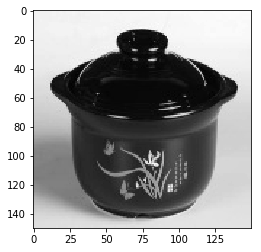

In [75]:
train_img_1=img_data_all[0,:].reshape(IMG_SIZE_FINAL,IMG_SIZE_FINAL) #for color (rows,cols,3)
plt.imshow(train_img_1,cmap='gray')

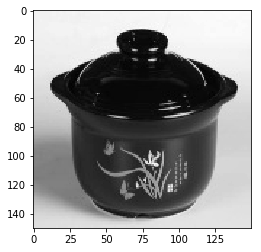

In [102]:


train_2D_img_1=img_2D_data_all[0,:] #for color (rows,cols,3)
plt.imshow(train_2D_img_1,cmap='gray')


In [76]:
img_data_all[0].shape

(22500,)

In [77]:
img_data_all[0][10:40]

array([211., 211., 211., 212., 212., 212., 211., 211., 211., 212., 211.,
       210., 211., 213., 213., 213., 213., 214., 214., 213., 212., 211.,
       212., 213., 212., 212., 214., 214., 214., 215.], dtype=float32)

In [78]:
img_data_all.shape

(4838, 22500)

In [79]:
print (label)

['hot_pot' 'hot_pot' 'hot_pot' ... 'water_filter' 'water_filter'
 'water_filter']


In [103]:
from sklearn.utils import shuffle
train_img_data ,train_label = shuffle(img_2D_data_all,label,random_state=10)


In [105]:
from sklearn.model_selection import train_test_split

xtrain,xvalidate,ytrain,yvalidate = train_test_split(train_img_data,train_label,test_size=.2,random_state=4)
#flattened data needs to be reshape to image format for passing to convolution network
# we need to pass the no of samples and the image dimension 
#x_train = xtrain.reshape(xtrain.shape[0],IMG_SIZE_FINAL,IMG_SIZE_FINAL,1)#,3 for color
#x_validate = xvalidate.reshape(xvalidate.shape[0],IMG_SIZE_FINAL,IMG_SIZE_FINAL,1)#,3 for color
#conver to float
x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
#data needs to be normalized from 0 to 255 to 0 to 1
x_train = x_train/255
x_validate = x_validate/255

In [106]:
ytrain

array(['office_chair', 'sofa', 'sofa', ..., 'office_chair', 'lamp',
       'sofa'], dtype='<U32')

In [107]:
pd.DataFrame(ytrain)[0].value_counts()

lamp             406
water_filter     396
office_chair     394
cooker           392
dinning_table    389
bowl             388
mirror           384
sofa             383
hot_pot          379
jug              359
Name: 0, dtype: int64

In [108]:
pd.DataFrame(yvalidate)[0].value_counts()

jug              103
hot_pot          103
water_filter      99
office_chair      99
sofa              98
mirror            97
lamp              96
cooker            95
dinning_table     89
bowl              89
Name: 0, dtype: int64

In [109]:
yvalidate

array(['bowl', 'bowl', 'cooker', 'cooker', 'mirror', 'hot_pot',
       'office_chair', 'jug', 'hot_pot', 'mirror', 'mirror', 'cooker',
       'hot_pot', 'mirror', 'office_chair', 'office_chair', 'jug',
       'hot_pot', 'jug', 'water_filter', 'sofa', 'hot_pot',
       'office_chair', 'lamp', 'water_filter', 'mirror', 'jug',
       'dinning_table', 'hot_pot', 'office_chair', 'mirror', 'jug',
       'lamp', 'mirror', 'office_chair', 'cooker', 'office_chair',
       'water_filter', 'dinning_table', 'mirror', 'mirror',
       'water_filter', 'jug', 'bowl', 'sofa', 'sofa', 'bowl', 'sofa',
       'water_filter', 'office_chair', 'bowl', 'lamp', 'cooker', 'sofa',
       'jug', 'lamp', 'sofa', 'bowl', 'lamp', 'mirror', 'water_filter',
       'hot_pot', 'jug', 'sofa', 'water_filter', 'cooker',
       'dinning_table', 'sofa', 'office_chair', 'dinning_table',
       'water_filter', 'water_filter', 'water_filter', 'lamp',
       'water_filter', 'lamp', 'mirror', 'office_chair', 'dinning_table',
   

In [89]:
ytrain

array(['office_chair', 'sofa', 'sofa', ..., 'office_chair', 'lamp',
       'sofa'], dtype='<U32')

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [111]:
label_encoder_train = LabelEncoder()
integer_encoded_ytrain = label_encoder_train.fit_transform(ytrain)
print(integer_encoded_ytrain)

[7 8 8 ... 7 5 8]


In [112]:
integer_encoded_ytrain = integer_encoded_ytrain.reshape(len(integer_encoded_ytrain), 1)
# print(integer_encoded_ytrain)

In [113]:
onehot_encoder_ytrain = OneHotEncoder(sparse=False , categories='auto')
onehot_encoder_ytrain = onehot_encoder_ytrain.fit_transform(integer_encoded_ytrain)
#print(onehot_encoder_ytrain)

In [114]:
''' Can use OneHotEncoder directly, but inverse transformation do not work completely in that case which also needs LabelEncoder 
ytrain_reshape = ytrain.reshape(len(ytrain), 1)

onehot_encoder_ytrain = OneHotEncoder(sparse=False)
onehot_encoder_ytrain = onehot_encoder_ytrain.fit_transform(ytrain_reshape)
print(onehot_encoder_ytrain)

inverted_ytrain = argmax(onehot_encoder_ytrain[0,:])
#inverted_ytrain = label_encoder_train.inverse_transform([argmax(onehot_encoder_ytrain[0,:])])

'''

' Can use OneHotEncoder directly, but inverse transformation do not work completely in that case which also needs LabelEncoder \nytrain_reshape = ytrain.reshape(len(ytrain), 1)\n\nonehot_encoder_ytrain = OneHotEncoder(sparse=False)\nonehot_encoder_ytrain = onehot_encoder_ytrain.fit_transform(ytrain_reshape)\nprint(onehot_encoder_ytrain)\n\ninverted_ytrain = argmax(onehot_encoder_ytrain[0,:])\n#inverted_ytrain = label_encoder_train.inverse_transform([argmax(onehot_encoder_ytrain[0,:])])\n\n'

In [115]:
label_encoder_yvalidate = LabelEncoder()
integer_encoded_yvalidate = label_encoder_yvalidate.fit_transform(yvalidate)
#print(integer_encoded_yvalidate)

integer_encoded_yvalidate = integer_encoded_yvalidate.reshape(len(integer_encoded_yvalidate), 1)
# print(integer_encoded_yvalidaten)

onehot_encoder_yvalidate = OneHotEncoder(sparse=False , categories='auto')
onehot_encoder_yvalidate = onehot_encoder_yvalidate.fit_transform(integer_encoded_yvalidate)
print(onehot_encoder_yvalidate)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [116]:
from numpy import argmax
# invert first example
inverted_ytrain = label_encoder_train.inverse_transform([argmax(onehot_encoder_ytrain[1,:])])
print(inverted_ytrain)

['sofa']


In [117]:
y_train_EN=onehot_encoder_ytrain
y_validate_EN=onehot_encoder_yvalidate

In [119]:
x_train.shape

(3870, 150, 150, 1)

TypeError: Invalid dimensions for image data

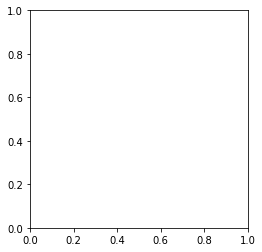

In [120]:
train_2D_img_1=x_train[0,:] #for color (rows,cols,3)
plt.imshow(train_2D_img_1,cmap='gray')

### Model hyperparameters 

In [134]:
V_EPOCH = 10
V_BATCH_SIZE = 2

In [135]:
from keras import optimizers
# create model - 2CNN 1 MAXPOOL, 
model = Sequential()
#CNN LAYER - no of filers = 32, mask = (5,5),i/p shape = image dimension 220,450,1; single channgel padding is reqd - same 
model.add(Conv2D(32,(3,3),input_shape=(IMG_SIZE_FINAL,IMG_SIZE_FINAL,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))  #o/p returns the features of the images

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))  #o/p returns the features of the images

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))  #o/p returns the features of the images

model.add(Flatten()) # acts as the i/p layer to dense which is 1st hidden layer
#dense layer  - always give no of neurons = 512, no of filters etc as pwoer of 2
#kernel initializer = normal means -> normally distributed weights
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(150, kernel_initializer='normal',activation='relu'))
model.add(Dense(200, kernel_initializer='normal',activation='relu'))
model.add(Dense(40, kernel_initializer='normal',activation='relu'))

model.add(Dropout(0.2))

#regularization - to avoid overfit - dropout - 20% neurons
#model.add(Dropout(0.5))
#o/p layer  - sigmoid for binary class ; softmax for multiclass
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
#sgd = optimizers.SGD(lr=0.01)
#sgd = optimizers.SGD(lr = 0.1, decay = 1e-6, momentum = 0.9, nesterov = True)
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit the model
#just to show 2 lines in console while model is fitting
#init = tf.global_variables_initializer() #- gpu
#with tf.Session(config = config) as s: #- gpu
model.fit(x_train,y_train_EN,validation_data=(x_validate,y_validate_EN),epochs=V_EPOCH,batch_size=V_BATCH_SIZE,verbose=2)


Train on 3870 samples, validate on 968 samples
Epoch 1/10
 - 58s - loss: 0.3389 - acc: 0.8997 - val_loss: 0.3269 - val_acc: 0.9000
Epoch 2/10
 - 64s - loss: 0.3309 - acc: 0.9000 - val_loss: 0.3261 - val_acc: 0.9000
Epoch 3/10
 - 64s - loss: 0.3301 - acc: 0.9000 - val_loss: 0.3266 - val_acc: 0.9000
Epoch 4/10
 - 67s - loss: 0.3300 - acc: 0.9000 - val_loss: 0.3268 - val_acc: 0.9000
Epoch 5/10
 - 69s - loss: 0.3295 - acc: 0.9000 - val_loss: 0.3257 - val_acc: 0.9000
Epoch 6/10
 - 72s - loss: 0.3293 - acc: 0.9000 - val_loss: 0.3257 - val_acc: 0.9000
Epoch 7/10
 - 68s - loss: 0.3291 - acc: 0.9000 - val_loss: 0.3256 - val_acc: 0.9000
Epoch 8/10
 - 67s - loss: 0.3289 - acc: 0.9000 - val_loss: 0.3259 - val_acc: 0.9000
Epoch 9/10
 - 70s - loss: 0.3287 - acc: 0.9000 - val_loss: 0.3256 - val_acc: 0.9000
Epoch 10/10
 - 68s - loss: 0.3286 - acc: 0.9000 - val_loss: 0.3264 - val_acc: 0.9000


In [136]:
acc = model.evaluate(x_validate,y_validate_EN)
print(acc)

968/968 [==============================] - 5s 5ms/step
[0.32635751046425054, 0.8999999761581421]


In [137]:
print(model.metrics_names)

['loss', 'acc']


In [141]:
x_validate

array([[[[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00390619],
         [0.00390619],
         [0.00390619],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        ...,

        [[0.00312188],
         [0.00312188],
         [0.00313725],
         ...,
         [0.0035371 ],
         [0.00349097],
         [0.00350634]],

        [[0.0031065 ],
         [0.00309112],
         [0.00309112],
         ...,
         [0.00350634],
         [0.0035371 ],
         [0.00356786]],

        [[0.00307574],
         [0.00307574],
         [0.00307574],
         ...,
         [0.0035371 ],
         [0.00355248],
         [0.00356786]]],


       [[[0.00392157],
         [0.00392157],
         [0.00

In [143]:
x_validate_full = x_validate * 255

In [146]:
x_validate_full.shape

(968, 150, 150, 1)

In [153]:
x_validate_full_flat = np.delete (x_validate_full , 3 , 0)

In [154]:
x_validate_full_flat.shape

(967, 150, 150, 1)

In [148]:
x_validate_full = x_validate_full.resize (x_validate_full[0],x_validate_full[1],x_validate_full[2])

TypeError: only integer scalar arrays can be converted to a scalar index

TypeError: Invalid dimensions for image data

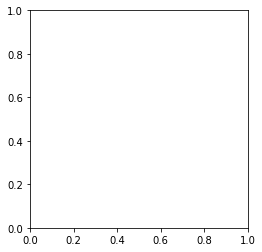

In [144]:
train_2D_img_1=x_validate_full[0,:] #for color (rows,cols,3)
plt.imshow(train_2D_img_1,cmap='gray')

In [124]:
y_predict = model.predict(x_validate)
y_predict

array([[0.10559147, 0.1043342 , 0.10554778, ..., 0.09711306, 0.10753797,
        0.10167412],
       [0.1055711 , 0.10431381, 0.1055272 , ..., 0.09709245, 0.10751837,
        0.10165337],
       [0.10558785, 0.10433068, 0.10554422, ..., 0.09710959, 0.10753459,
        0.10167062],
       ...,
       [0.10557465, 0.10431754, 0.1055311 , ..., 0.09709615, 0.10752188,
        0.10165729],
       [0.10558236, 0.10432515, 0.10553864, ..., 0.09710387, 0.10752919,
        0.10166495],
       [0.10558533, 0.10432811, 0.1055417 , ..., 0.09710699, 0.10753216,
        0.10166822]], dtype=float32)

In [140]:
y_predict[0]

array([0.10559147, 0.1043342 , 0.10554778, 0.10078602, 0.09856696,
       0.11514804, 0.10579421, 0.09711306, 0.10753797, 0.10167412],
      dtype=float32)

In [125]:
y_pred = []

for val in y_predict:
    y_pred.append(np.argmax(val))
    
print(y_pred)  
print(y_validate_EN)
print(yvalidate)



[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [132]:
cr = metrics.classification_report(y_validate_EN,y_pred)
print(cr)

#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_validate_EN,y_pred)
print(cm)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets